## 分析数据

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties  # 导入FontProperties

ap = pd.read_csv('data_americanPopulation.csv')
ap.head()

,年份,人口/亿
0,2020,3.32
1,2019,3.28
2,2018,3.27
3,2017,3.25
4,2016,3.23


In [4]:
ap.shape

(71, 2)

<ipython-input-9-3e072fe9fe27>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('美国1950-2020的总人口数',fontProperties = font,size = 16)


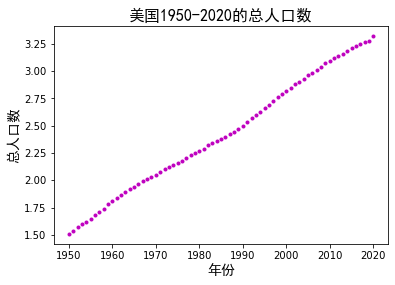

In [9]:
x = sorted(np.array(ap)[:,0])
y = sorted(np.array(ap)[:,1])

font = FontProperties(fname="C:/Windows/Fonts/SimHei.ttf", size=14)  # 设置字体

plt.plot(x, y, color='m', linestyle='', marker='.')
plt.xlabel('年份',fontproperties=font)
plt.ylabel('总人口数',fontproperties=font)
plt.title('美国1950-2020的总人口数',fontProperties = font,size = 16)
plt.show()

## Summary
### 确立模型
由作图的结论得出：美国随年份而变化的总人口数可近似视为线性关系$，$可建立线性模型预测2030年的人口数量$。$

考虑到人口基数作用问题以及之前学过的传染病模型$，$建立上一年人口数和当年人口总数递推线性模型$。$

其中，用预测值与实际真实值的差值作为预测误差，衡量建立模型的优缺。

### 模型建立
设此关系的线性方程为$\hat y_i = ax_{i-1}+b+\epsilon，i\in[1950,2020],$则第i年预测的美国人口总数为
$$\hat y_i = ax_{i-1}+b，i\in[1950,2030]$$
预测误差为 $\epsilon = y_i-\hat y_i\ $

其中 $，y_{i-1}和y_i$ 分别表示美国第 $i-1年和第i$年的总人口数 $，\epsilon$ 表示预测误差。

## 模型求解
基于已有数据，将所有的预测误差累加得到的函数作为**目标函数**进行优化，其最小值即认为是参数最优的目标模型。目标函数可表示为
$$\epsilon = \sum\limits_i ({y_i- ay_{i-1}-b)^2}$$ 


In [10]:
from sympy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from matplotlib.font_manager import FontProperties

ap = pd.read_csv('data_americanPopulation.csv')
ap

,年份,人口/亿
0,2020,3.32
1,2019,3.28
2,2018,3.27
3,2017,3.25
4,2016,3.23
...,...,...
66,1954,1.62
67,1953,1.60
68,1952,1.57
69,1951,1.54


In [11]:
y2 = np.array(ap)[:,1]   # 当年
y1 = y2[1:len(y2)]       # 前一年


y1 = np.zeros(len(y1))
y2 = np.zeros(len(y2))

In [12]:
def discrepance(x):
    return sum((yi - x[0]*yi_1 - x[1]) ** 2 for yi, yi_1 in zip(y2, y1))

In [13]:
res = opt.minimize(discrepance, x0=[0, 0], method='nelder-mead')

print("a: {}, b: {}".format(res.x[0], res.x[1]))

a: 0.0, b: 0.0


In [14]:
# 得出模型
yi_1 = symbols('yi_1')
y_p = res.x[0] * yi_1 + res.x[1]
y_p

0

In [15]:
# 最后，将拟合的模型对应到真实的数据中
# def y__(x):
#     return res.x[0] * x + res.x[1]
# y_pre = y__(years)
# plt.plot(years, people_num, '-', years, y_pre, '--')
# plt.xlabel('Year')
# plt.ylabel('People Number')
# plt.title('American Census from 1950 to 2020')
# plt.legend(['real data', 'predict data'])
# plt.shoa()

In [16]:
# # 预测2020年和2021年的美国人口
# year_2020 = y_p.evalf(subs={x:2020})
# year_2021 = y_p.evalf(subs={x:2021})
# print(year_2020)
# print(331761000)
# print("美国2020年的人口总数预测结果为为：{:.0f}，与实际值的误差为：{:.0f}".format(year_2020, np.abs(year_2020-331761000.0)))
# print("美国2021年的人口总数预测结果为为：{:.0f}，与实际值的误差为：{:.0f}".format(year_2021, np.abs(year_2021-332213000)))
# # 预测美国2030年人口总数
# year_2030 = y.evalf(subs={x:2030})
# print("美国2030年的人口总数预测结果为为：{:.0f}。".format(year_2030))


In [17]:
# 验证2021年，并预测2030年
y_2021 = y_p.evalf(subs=3.32)
print("美国2021年的人口预测为：{:.0f}， 与真实人口的误差为：{:.0f}".format(y_2021, np.abs(y_2021 - 3.32)))
temp = y_2021
for i in range(8):
    temp = y_p.evalf(subs={yi_1:temp})
    print("美国{}年的人口预测为：{:.0f}。".format((2022+i+1),temp))


TypeError: unsupported format string passed to Zero.__format__